In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings("ignore")

In [341]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [342]:
df.shape

(10886, 12)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [344]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [345]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [346]:
df.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [347]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [348]:
np.any(df.duplicated())

False

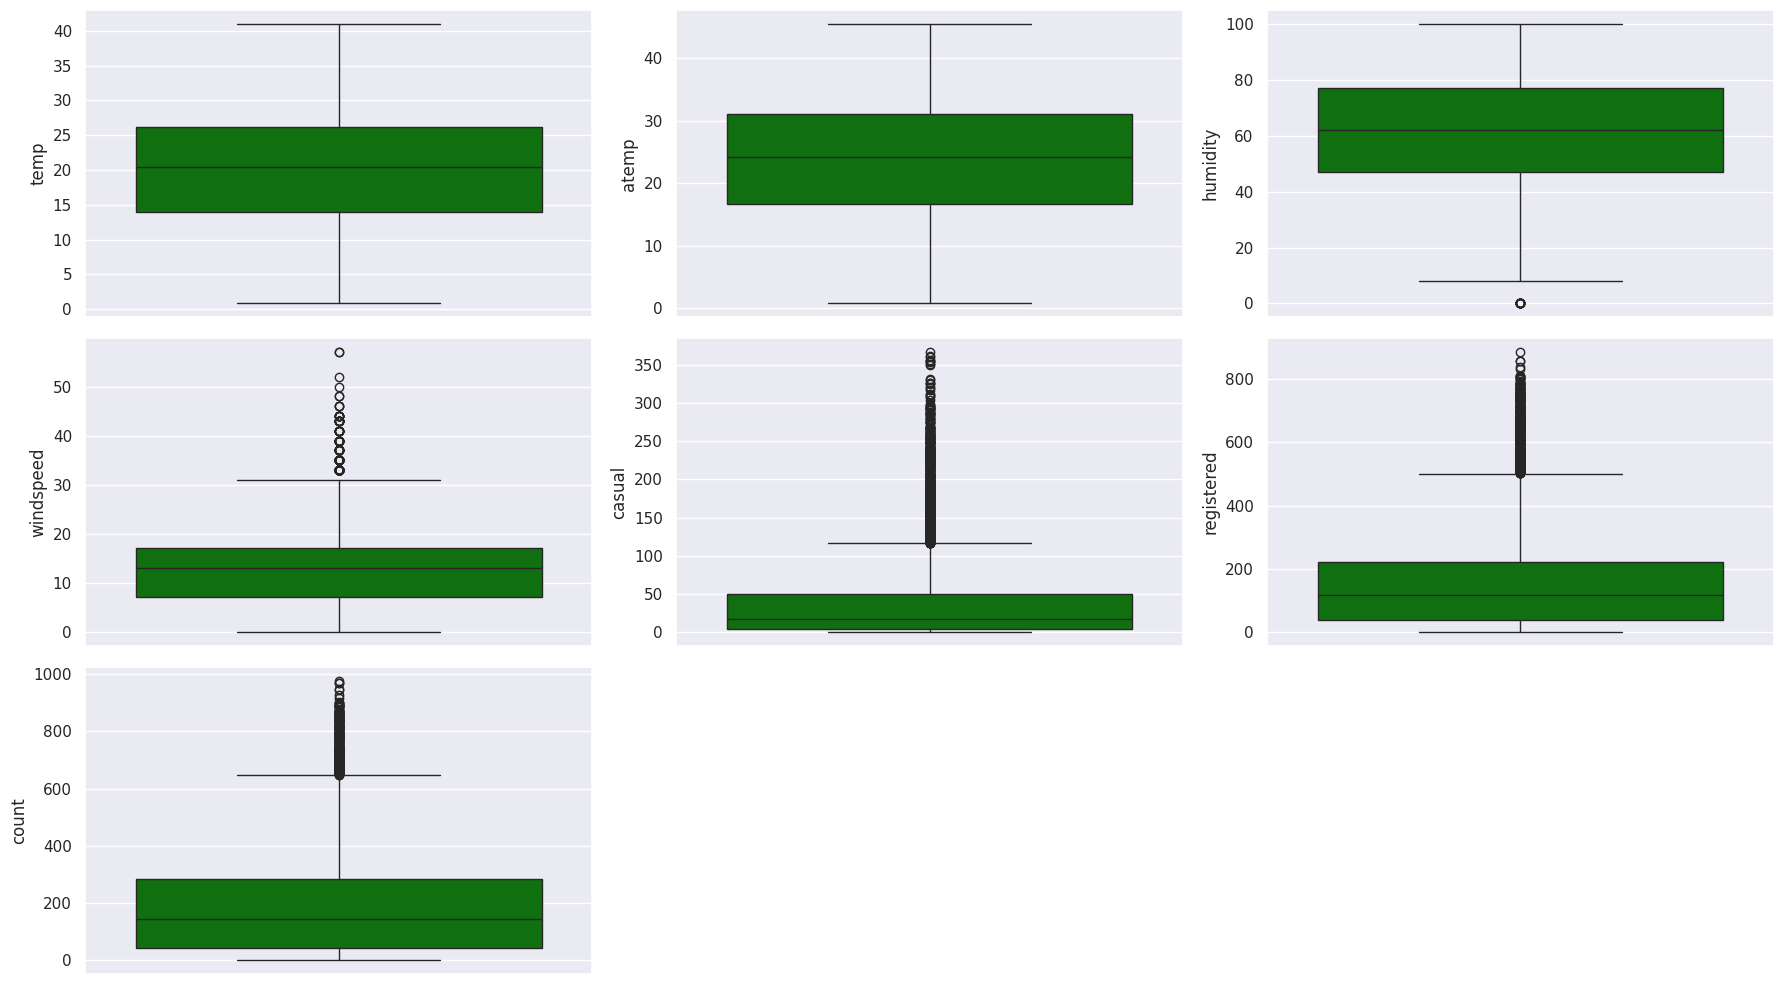

In [349]:
plt.figure(figsize=(18,10))

# Box Plot for Age
plt.subplot(3,3,1)
sns.boxplot(df['temp'],color='green')

# Box Plot for Usage
plt.subplot(3,3,2)
sns.boxplot(df['atemp'],color='green')

#Box Plot for Fitness
plt.subplot(3,3,3)
sns.boxplot(df['humidity'],color='green')

#Box Plot for Income
plt.subplot(3,3,4)
sns.boxplot(df['windspeed'],color='green')

#Box Plot for Miles
plt.subplot(3,3,5)
sns.boxplot(df['casual'],color='green')

plt.subplot(3,3,6)
sns.boxplot(df['registered'],color='green')

plt.subplot(3,3,7)
sns.boxplot(df['count'],color='green')

plt.tight_layout()
plt.show()

In [350]:
#Remove/clip the data between the 5 percentile and 95 percentile
def detect_outleirs(new_df,var):
    # Calculate the IQR for the variable
    Q1 = np.percentile(new_df, 25)
    Q3 = np.percentile(new_df, 75)
    Q2 = np.percentile(new_df, 50)
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers for the variable
    outliers = new_df[(new_df< lower_threshold) | (new_df> upper_threshold)]

    # Calculate the percentage of outliers
    #outlier_percentage = round(len(outliers) / len(df) * 100, 2 )

    # Output the percentage of outliers
    print(f'{var}-->')
    print("Q1: ",Q1)
    print("Q3: ",Q3)
    print("Median: ",Q2)
    print(f"Inner Quartile Range for {var}: {Q3}-{Q1}")
    print(f"{var} Outlier count : {len(outliers)}")
    #print(f"Percentage of outliers for {var}: {outlier_percentage}% \n")
    return np.clip(new_df, np.percentile(new_df, 5), np.percentile(new_df,95))

In [351]:
clipped_temp= (detect_outleirs(df['temp'],df.columns[5]))

temp-->
Q1:  13.94
Q3:  26.24
Median:  20.5
Inner Quartile Range for temp: 26.24-13.94
temp Outlier count : 0


In [352]:
clipped_atemp= (detect_outleirs(df['atemp'],df.columns[6]))

atemp-->
Q1:  16.665
Q3:  31.06
Median:  24.24
Inner Quartile Range for atemp: 31.06-16.665
atemp Outlier count : 0


In [353]:
clipped_humidity= (detect_outleirs(df['humidity'],df.columns[7]))

humidity-->
Q1:  47.0
Q3:  77.0
Median:  62.0
Inner Quartile Range for humidity: 77.0-47.0
humidity Outlier count : 22


In [354]:
clipped_windspeed= (detect_outleirs(df['windspeed'],df.columns[8]))

windspeed-->
Q1:  7.0015
Q3:  16.9979
Median:  12.998
Inner Quartile Range for windspeed: 16.9979-7.0015
windspeed Outlier count : 227


In [355]:
clipped_casual= (detect_outleirs(df['casual'],df.columns[9]))

casual-->
Q1:  4.0
Q3:  49.0
Median:  17.0
Inner Quartile Range for casual: 49.0-4.0
casual Outlier count : 749


In [356]:
clipped_registered= (detect_outleirs(df['registered'],df.columns[10]))

registered-->
Q1:  36.0
Q3:  222.0
Median:  118.0
Inner Quartile Range for registered: 222.0-36.0
registered Outlier count : 423


In [357]:
clipped_count= (detect_outleirs(df['count'],df.columns[11]))


count-->
Q1:  42.0
Q3:  284.0
Median:  145.0
Inner Quartile Range for count: 284.0-42.0
count Outlier count : 300


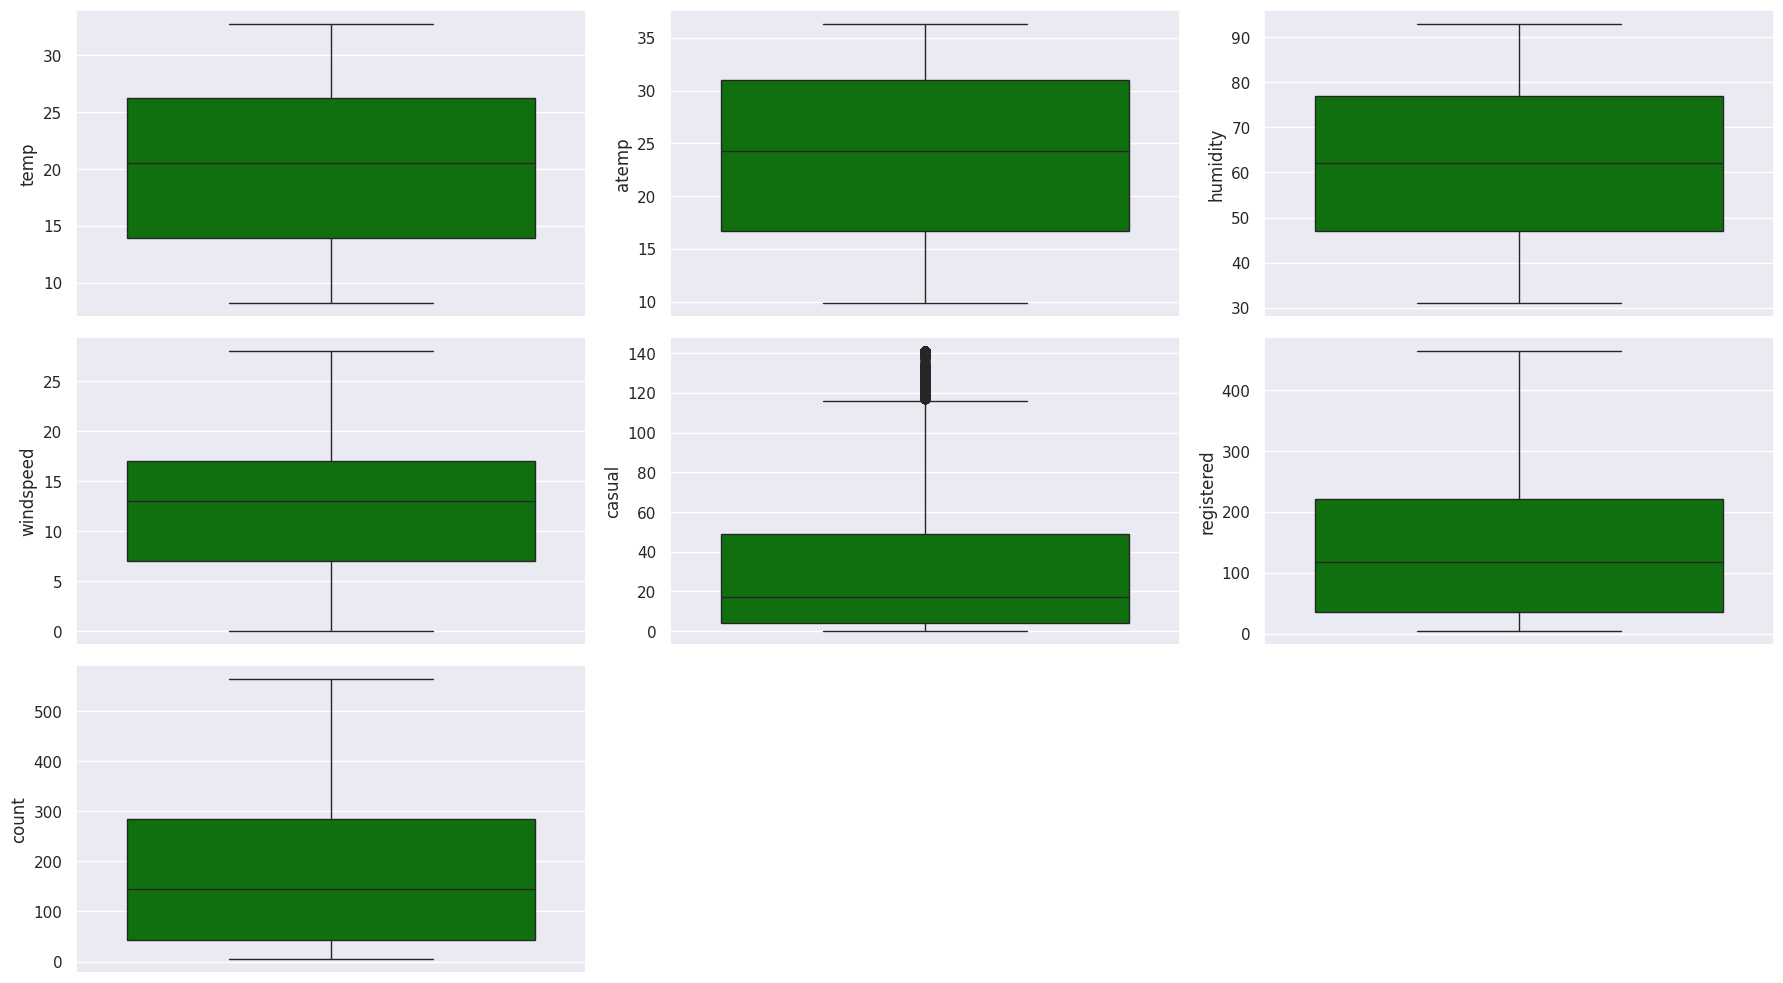

In [358]:
plt.figure(figsize=(18,10))

# Box Plot for Age
plt.subplot(3,3,1)
sns.boxplot(clipped_temp,color='green')

# Box Plot for Usage
plt.subplot(3,3,2)
sns.boxplot(clipped_atemp,color='green')

#Box Plot for Fitness
plt.subplot(3,3,3)
sns.boxplot(clipped_humidity,color='green')

#Box Plot for Income
plt.subplot(3,3,4)
sns.boxplot(clipped_windspeed,color='green')

#Box Plot for Miles
plt.subplot(3,3,5)
sns.boxplot(clipped_casual,color='green')

plt.subplot(3,3,6)
sns.boxplot(clipped_registered,color='green')

plt.subplot(3,3,7)
sns.boxplot(clipped_count,color='green')

plt.tight_layout()
plt.show()

**<h3>Insight<h3>**

Here, season colum is uniformly distributed. We got twice the workingday than holiday/weekend. Weather is mostly clear, sometimes we get mist or snowfall. But rarely a bad weather. Which is expected as people don't get out on bike on bad weather.<br>
atemp, humidity has normal distribution. But windspeed and count seems to be right skewed with too many outliers. Let's drop the outliers rows.

In [359]:
corr_data = df.corr()
corr_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


[]

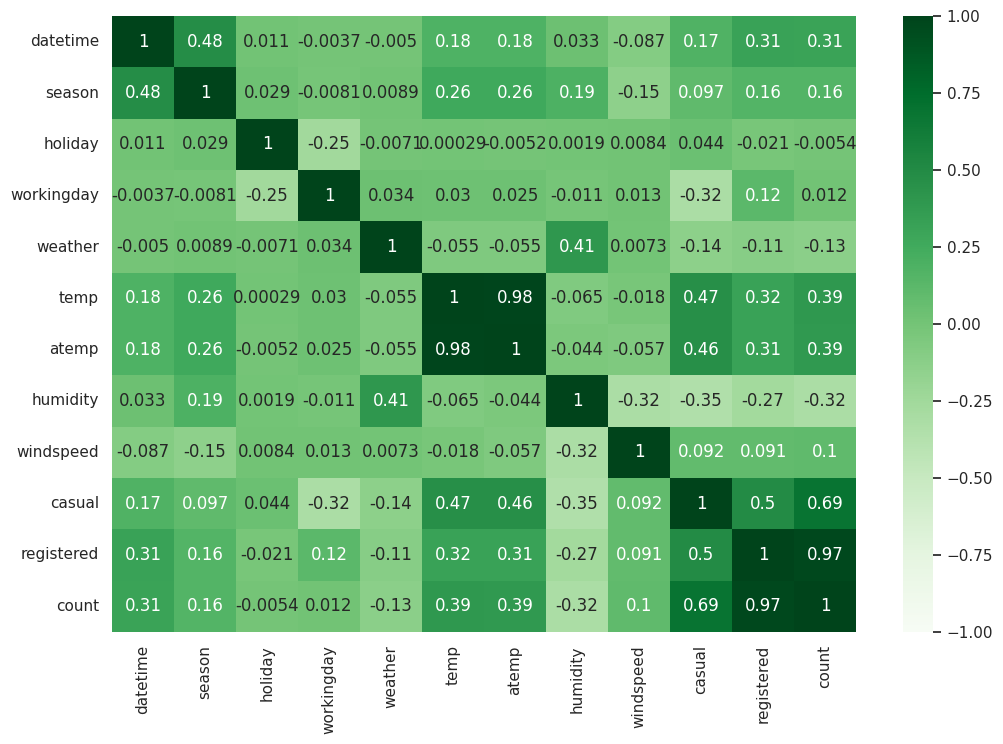

In [360]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

**<h3>Insight<h3>**

Here, count column seems to have positive correlation with atemp and and negative with humidity. Although they around only 30-40%. But we can see people go out with bike more when the temp is high and humidity is low. Seems expected.



In [361]:
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})


[]

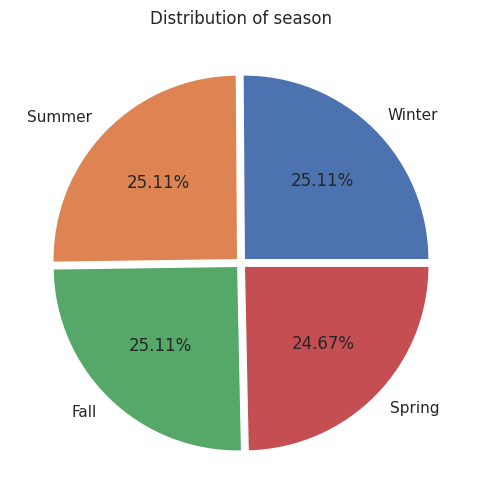

In [362]:
plt.figure(figsize = (6, 6))      # setting the figure size to 6*6

# setting the title of the plot
plt.title('Distribution of season')

df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()

# Creating the pie-chart
plt.pie(x = df_season['proportion'],
        explode = [0.025, 0.025, 0.025, 0.025],
        labels = df_season.index,
        autopct = '%.2f%%',
        )

plt.plot()

In [363]:
df_season

,proportion
season,
Winter,25.11
Summer,25.11
Fall,25.11
Spring,24.67


[]

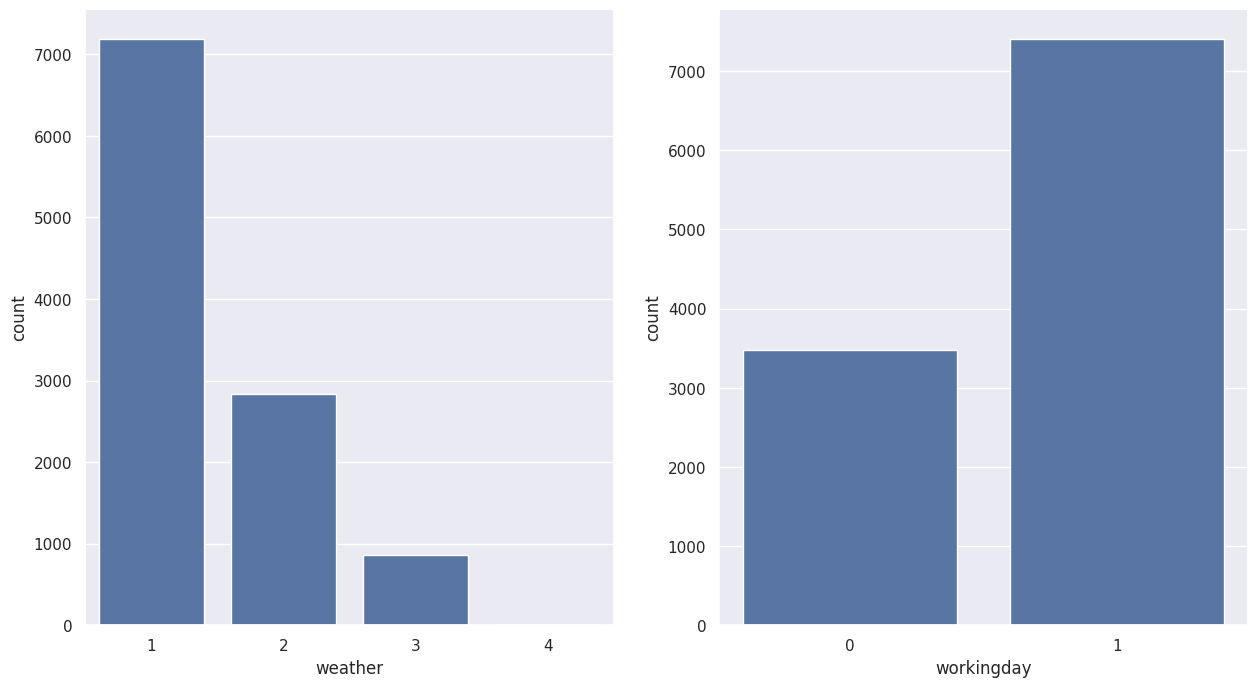

In [364]:
fig=plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'weather')
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'workingday')
plt.plot()

In [365]:
def hist_box(column):
    fig=plt.figure(figsize=(15,4))
    sns.set(style="darkgrid")
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')

    tabular_data = df[column].describe().reset_index()
    tabular_data.columns = ['Statistic', 'Value']
    display(tabular_data)

    plt.tight_layout()
    plt.show()

,Statistic,Value
0,count,10886.00000
1,mean,20.23086
2,std,7.79159
3,min,0.82000
4,25%,13.94000
5,50%,20.50000
6,75%,26.24000
7,max,41.00000


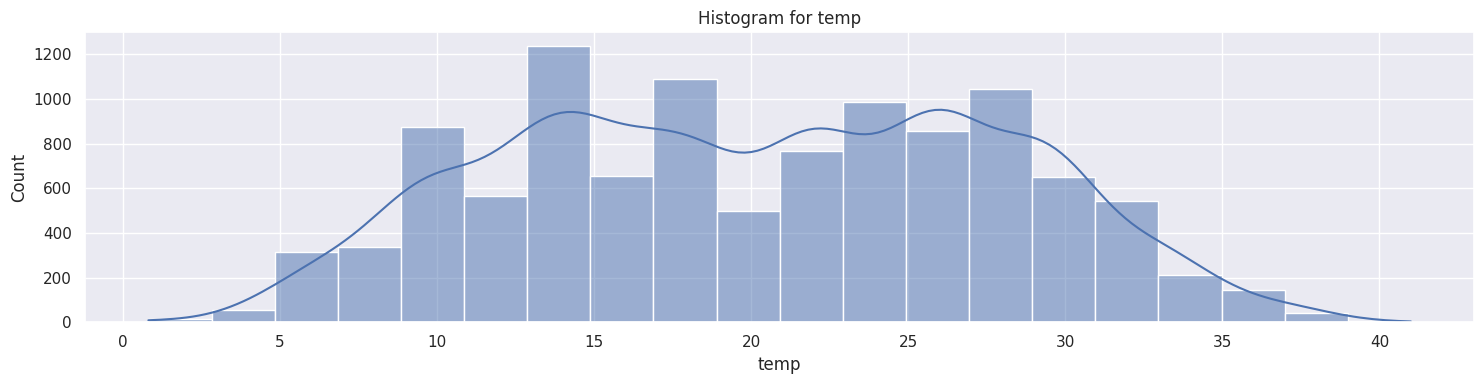

,Statistic,Value
0,count,10886.000000
1,mean,23.655084
2,std,8.474601
3,min,0.760000
4,25%,16.665000
5,50%,24.240000
6,75%,31.060000
7,max,45.455000


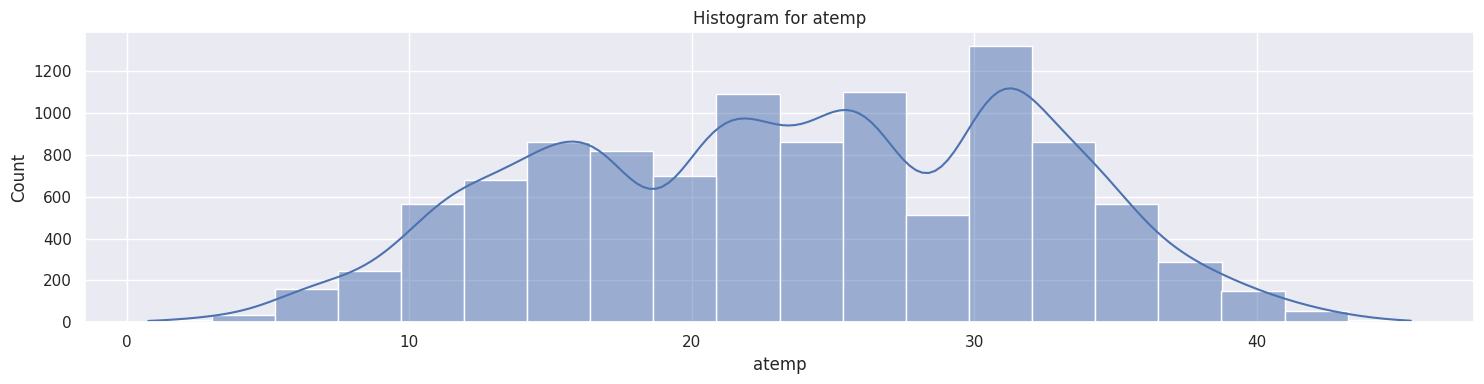

,Statistic,Value
0,count,10886.000000
1,mean,61.886460
2,std,19.245033
3,min,0.000000
4,25%,47.000000
5,50%,62.000000
6,75%,77.000000
7,max,100.000000


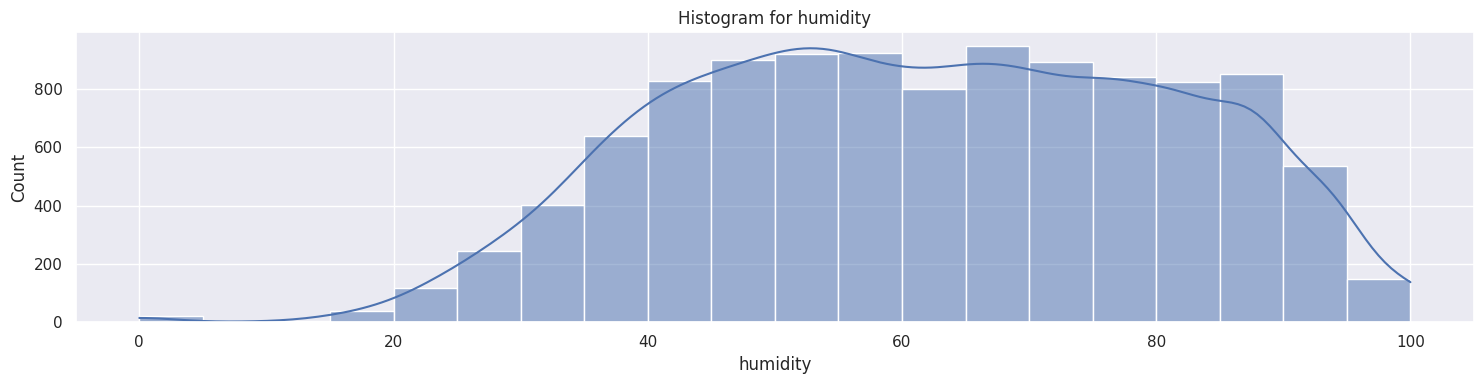

,Statistic,Value
0,count,10886.000000
1,mean,12.799395
2,std,8.164537
3,min,0.000000
4,25%,7.001500
5,50%,12.998000
6,75%,16.997900
7,max,56.996900


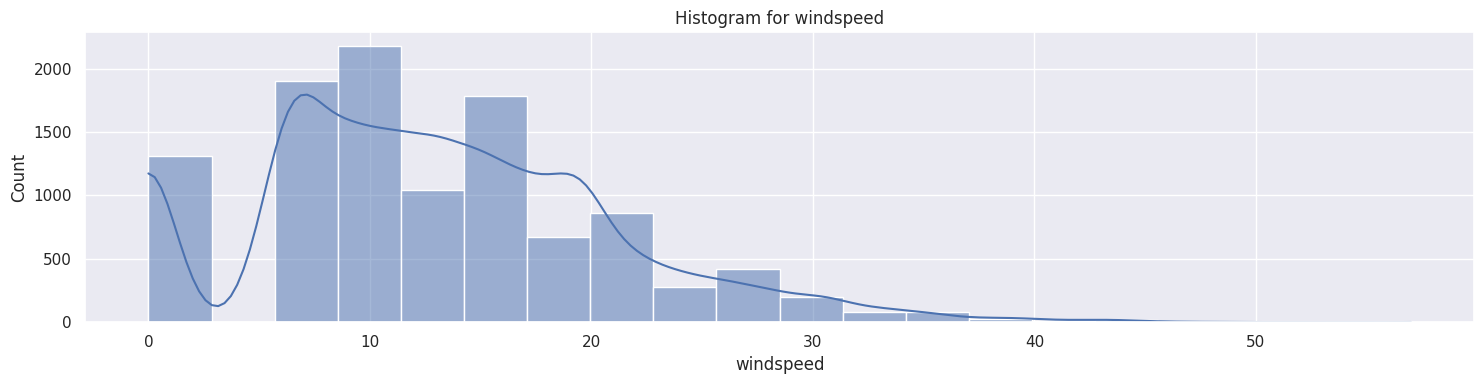

,Statistic,Value
0,count,10886.000000
1,mean,36.021955
2,std,49.960477
3,min,0.000000
4,25%,4.000000
5,50%,17.000000
6,75%,49.000000
7,max,367.000000


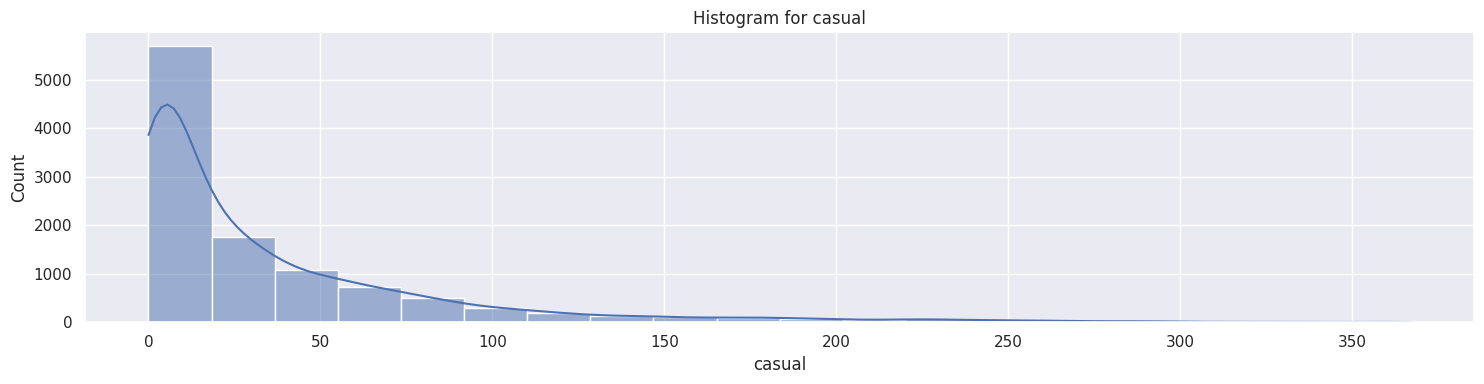

,Statistic,Value
0,count,10886.000000
1,mean,155.552177
2,std,151.039033
3,min,0.000000
4,25%,36.000000
5,50%,118.000000
6,75%,222.000000
7,max,886.000000


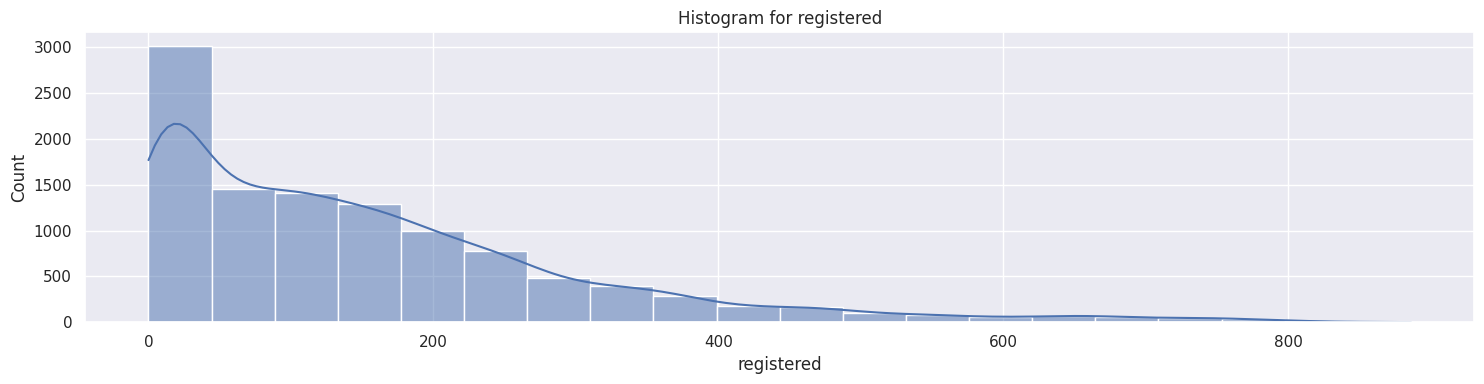

,Statistic,Value
0,count,10886.000000
1,mean,191.574132
2,std,181.144454
3,min,1.000000
4,25%,42.000000
5,50%,145.000000
6,75%,284.000000
7,max,977.000000


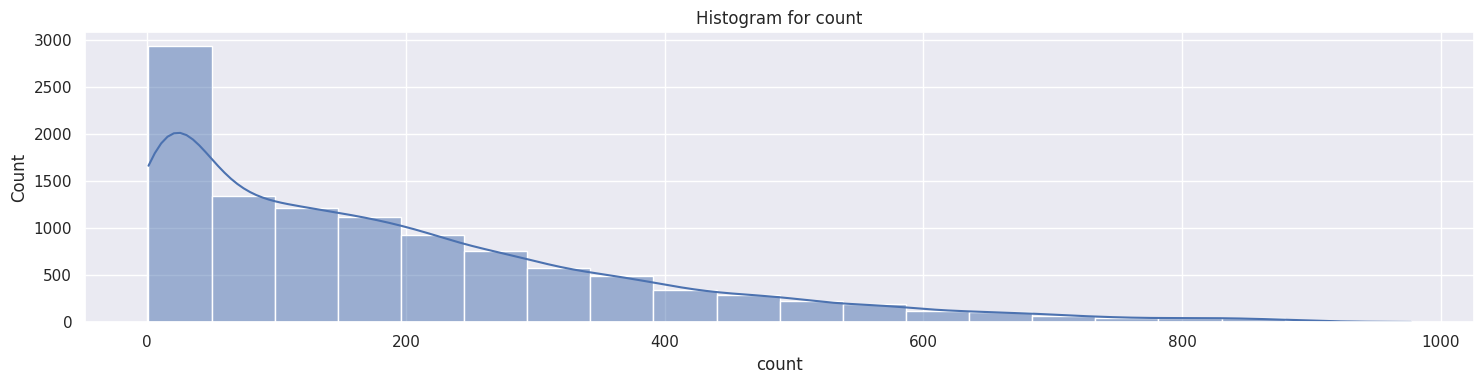

In [366]:
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for column in num_col:
    hist_box(column)

**<h3>Insight<h3>**

Numerical column analysis

Temp:

The 'temp' column shows a diverse temperature range (0.82 to 41.0), with a median of 20.5 and moderate variability around the mean of approximately 20.23 degrees Celsius.
Atemp

The 'atemp' column displays a wide range of apparent temperatures (0.76 to 45.455), with a mean of approximately 23.66 and moderate variability around the median of 24.24.
Humidity

The 'humidity' column depicts a range of humidity values (0 to 100), with an average around 61.89. The distribution shows moderate variability, from 47 at the 25th percentile to 77 at the 75th percentile, indicating diverse humidity levels in the dataset.
WindSpeed

The 'windspeed' column displays a range of wind speeds from 0 to 56.9979, with a mean of approximately 12.80.
Casual

The 'casual' column demonstrates a broad range of casual bike rental counts, with values spanning from 0 to 367. The distribution is positively skewed, as indicated by the mean (36.02) being less than the median (17.0).
Registered

The 'registered' column showcases a diverse range of registered bike rental counts, ranging from 0 to 886. The distribution is positively skewed, evidenced by the mean (155.55) being less than the median (118.0).
Count

The 'count' column reveals a wide range of total bike rental counts, varying from 1 to 977. The distribution is positively skewed, with a mean (191.57) greater than the median (145.0), indicating a concentration of lower values

if there any significant difference between the no. of bike rides on Weekdays
and Weekends?

Hypothesis Testing

Demand of bicycles on rent is the same on Weekdays & Weekends
Since we have two independent saples, we can go with Two Sample Independent T-Test.

Assumptions of Two Sample Independent T-Test :

The data should be normall distributed

variances of the two groups are equal

Let the Confidence interval be 95%, so siginificance (alpha) is 0.05

To check if the data is normal, we will go with Wilkin-ShapiroTest.
The test hypothesis for the Wilkin-Shapiro test are:

Ho: Data is normally distributed

Ha: Data is not normally distributed.

In [367]:
np.random.seed(41)

df_subset = df.sample(100)["count"]

test_stat, p_val = spy.shapiro(df_subset)

p_val

2.6341072612012795e-07

Hence the p_values is lesser than the significance level, Null hypothesis can be rejected.

Therefore, the Data is not normally distributed.

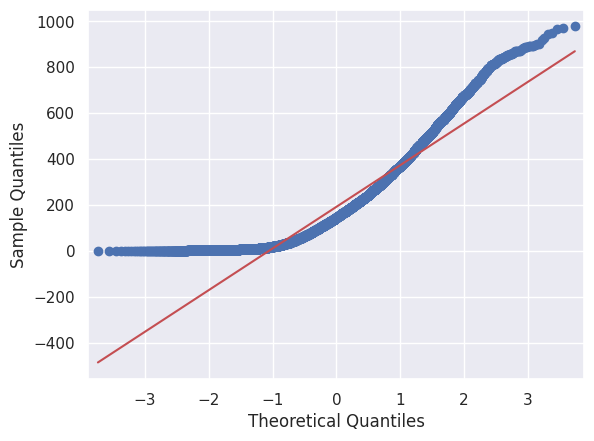

In [368]:
# QQ plot

qqplot(df['count'], line = 's')
plt.show()

To check if the variances of two groups are equal. We will perform Levene's test
The Test hypotheses for Levene's test are:

Ho: The variances are equal.


Ha: The variances are not equal.

In [369]:
working_day = df[df['workingday'] == 0]['count']

holiday = df[df['workingday'] == 1]['count']

levene_stat, p_val = levene(working_day, holiday)

p_val

0.9437823280916695

<Axes: xlabel='count', ylabel='Density'>

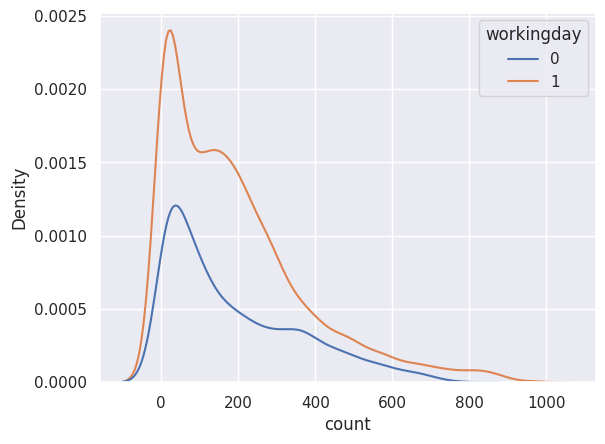

In [370]:
sns.kdeplot(data = df, x = 'count', hue = 'workingday')

Hence the p_values is greater than the significance level, Null hypothesis can be accepted.

Therefore, the variances are approximately equal.

Despite the data is not normally distributed according to both the Wilkin-ShapiroTest and qq-plot

It is important to highlight that the variances between the two groups are equal

**So we can proceed with the Two Sample Independent T-Test.

The hypothesis for the t-test are:

Ho: There is no significant difference between working and non-working days.


Ha: There is a significant difference between working and non-working days.

In [371]:
ttest_stat, p_val = ttest_ind(working_day, holiday)

p_val

0.22644804226361348

Hence the p_values is greater than the significance level, Null hypothesis can be accepted.

Therefore, There is no significant difference on bike rentals between working and non-working days.

In [372]:
kruskal_stat, p_val = kruskal(working_day, holiday)

p_val

0.9679113872727798

Hence the p_values is greater than the significance level, Null hypothesis can be accepted.

Therefore, There is no significant difference on bike rentals between working and non-working days.

Demand of bicycles on rent is the same for different Weather conditions

Since we have more than two categories now, so will use ANOVA here.

Assumptions for ANOVA are:

The population data should be normally distributed- The data is not normal as verified by Wilkin-Shapiro test and the qqplot.


The data points must be independent- This condition is satisfied.


Approximately equal variance within groups- This will be verified using Levene's test.

In [373]:
df.groupby('weather')['count'].skew()

weather
1    1.139857
2    1.294444
3    2.187137
4         NaN
Name: count, dtype: float64

In [374]:
# kurtosis test of weather

df.groupby('weather')['count'].apply(lambda x: x.kurtosis())

weather
1    0.964720
2    1.588430
3    6.003054
4         NaN
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Density'>

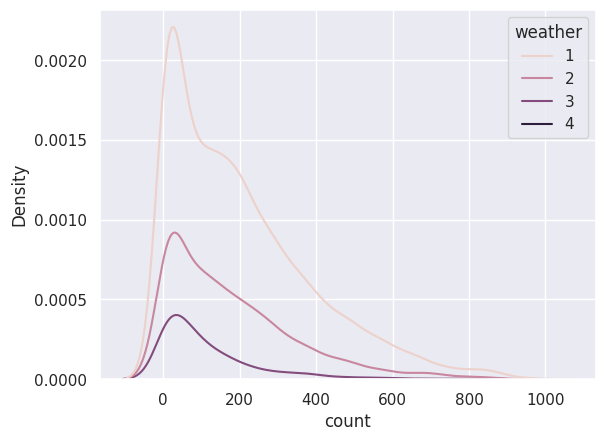

In [375]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')

The Test hypothesis for Levene's test are:

Ho: The variances are equal.


Ha: The variances are not equal.

In [376]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
weather4 = df[df['weather'] == 4]['count']

levene_stat, p_val = levene(weather1, weather2, weather3,weather4)

p_val

3.504937946833238e-35

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

Therefore, the variances are not equal.

Two of the three conditions of ANOVA are not met, We will still perform ANOVA.

Then We will also perform Kruskal's test and compare the results.

In case of any discrepancies, Kruskal's test results will be considered, since data does not met conditions of ANOVA.

The hypothesis for ANOVA are:

Ho: There is no significant difference between demand of bicycles for different Weather conditions.


Ha: There is a significant difference between demand of bicycles for different Weather conditions.

In [377]:
anova_stat, p_val = f_oneway(weather1, weather2, weather3,weather4)

p_val

5.482069475935669e-42

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

Therefore, There is a significant difference between demand of bicycles for different Weather conditions.

Kruskal Test on weather


In [378]:
kruskal_stat, p_val = kruskal(weather1, weather2, weather3,weather4)

p_val

3.501611300708679e-44

Again the p_values is smaller than the significance level, Null hypothesis can be rejected.

Therefore, we can conclude that there is a significant difference between demand of bicycles for different Weather conditions.

Demand of bicycles on rent is the same for different Seasons

Here also we have more than two categories now, so will use ANOVA here.

Assumptions for ANOVA are:

The population data should be normally distributed- The data is not normal as verified by Wilkin-Shapiro test and the qqplot.


The data points must be independent- This condition is satisfied.


Approximately equal variance within groups- This will be verified using Levene's test.

In [379]:
df.groupby('season')['count'].skew()


season
Fall      0.991495
Spring    1.888056
Summer    1.003264
Winter    1.172117
Name: count, dtype: float64

In [380]:
df.groupby('weather')['count'].apply(lambda x: x.kurtosis())


weather
1    0.964720
2    1.588430
3    6.003054
4         NaN
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Density'>

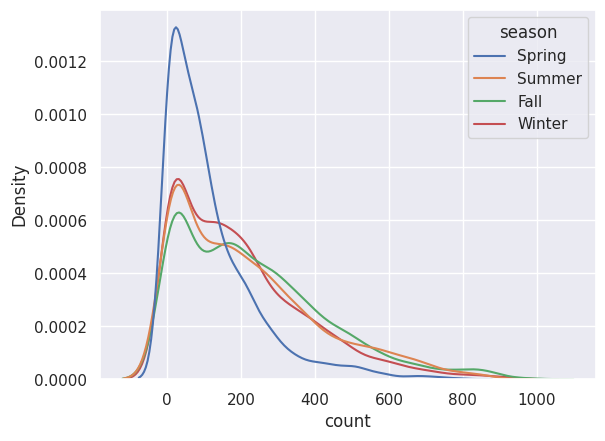

In [381]:
sns.kdeplot(data = df, x = 'count', hue = 'season')


The Test hypothesis for Levene's test are:

Ho: The variances are equal.


Ha: The variances are not equal.

In [382]:
spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']

levene_stat, p_val = levene(spring,summer,fall,winter)

p_val

nan

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

Therefore, the variances are not equal.

As like before, we still use both ANOVA and Kruskal's test, comparing the results.

If discrepancies arise, we'll rely on Kruskal's test, Since data does not met the conditions for ANOVA.

The hypothesis for ANOVA are:

Ho: There is no significant difference between demand of bicycles for different Seasons.


Ha: There is a significant difference between demand of bicycles for different Seasons.

In [383]:
anova_stat, p_val = f_oneway(spring ,summer, fall, winter)

p_val

nan

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

Therefore, There is a significant difference between demand of bicycles for different Seasons.

Kruskal Test on season

In [384]:
kruskal_stat, p_val = kruskal(spring ,summer, fall, winter)

p_val

nan

Again the p_values is smaller than the significance level, Null hypothesis can be rejected.

Therefore, we can conclude that there is a significant difference between demand of bicycles for different Seasons.

Analysis of Weather Conditions Across Seasons using Chi-square Test

The hypothesis for the chi-square test are:

Ho: Season and Weather are independent of each other.

Ha: Season and Weather are dependent on each other.

In [385]:
contingency_table = pd.crosstab(df['weather'], df['season'])

contingency_table

season,Fall,Spring,Summer,Winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [386]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.80559765e+03, 1.77454639e+03, 1.80559765e+03, 1.80625831e+03],
       [7.11493845e+02, 6.99258130e+02, 7.11493845e+02, 7.11754180e+02],
       [2.15657450e+02, 2.11948742e+02, 2.15657450e+02, 2.15736359e+02],
       [2.51056403e-01, 2.46738931e-01, 2.51056403e-01, 2.51148264e-01]]))

Hence the p_values(1.5499250736864862e-07) is smaller than the significance level, Null hypothesis can be rejected.

Therefore, we can conclude that Season and Weather are dependent on each other.

**<h2>Recommendations<h2>**


 - **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

 - **Time-based Pricing**: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

 - **Weather-based Promotions**: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

 - **User Segmentation**: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

 - **Optimize Inventory**: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

 - **Improve Weather Data Collection**: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

 - **Customer Comfort**: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

 - **Collaborations with Weather Services**: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

 - **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

 - **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

 - **Social Media Marketing**: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

 - **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.
